##### STAGE 05 - MODEL TRAINING PIPELINE

###### ===========================================================
###### BASELINE MODELS
`We would be evaluating DummyRegressor, LinearRegression, Ridge, Lasso and ElasticNet for the choice of our baseline model`
###### ===========================================================

###### `Import the Necessary Libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

###### `Load the datasets ===>>> train and evaluation`

In [2]:
train_data = pd.read_csv("../data/processed_data/scaled_engineered_training_data.csv")
eval_data = pd.read_csv("../data/processed_data/scaled_engineered_evaluation_data.csv")

###### `Select Features and Target`

In [3]:
target_column = "price"
feature_columns = [col for col in train_data.columns if col != target_column]
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_eval = eval_data[feature_columns]
y_eval = eval_data[target_column]

`1.0: Baseline Model 1 ==>> DummyRegressor`

In [5]:
baseline_DR = DummyRegressor(strategy="median")
baseline_DR.fit(X_train, y_train)

,strategy,'median'
,constant,None
,quantile,None


###### Prediction with baseline_DR

In [7]:
y_pred = baseline_DR.predict(X_eval)
y_pred[5]

np.float64(263456.7523133691)

###### `Metrics Evaluation of the baseline_DR model`

In [10]:
def metric_evaluation(y_pred, y_eval):
    mse = mean_squared_error(y_pred, y_eval)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_pred, y_eval)
    r2 = r2_score(y_pred, y_eval)

    print("The baseline model metrics are: ")
    print(f"ROOT_MEAN_SQUARED_ERROR:  {rmse:,.2f}")
    print(f"MEAN_ABSOLUTE_ERROR:  {mae:,.2f}")
    print(f"COEFFICIENT_OF_DETERMINATION: {r2*100:,.2f}%")

metric_evaluation(y_pred, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  405,014.95
MEAN_ABSOLUTE_ERROR:  233,289.56
COEFFICIENT_OF_DETERMINATION: 0.00%


`1.1 Baseline Model 2 ===>> LinearRegression`

In [11]:
baseline_LR = LinearRegression()
baseline_LR

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
baseline_LR.fit(X_train, y_train)
y_pred_LR = baseline_LR.predict(X_eval)
metric_evaluation(y_pred_LR, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  344,535.46
MEAN_ABSOLUTE_ERROR:  196,279.10
COEFFICIENT_OF_DETERMINATION: -266.42%


`1.2 Baseline Model 3 ===>> Ridge Regression`

In [14]:
baseline_RD = Ridge(alpha=1.0, random_state=42)
baseline_RD

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [15]:
baseline_RD.fit(X_train, y_train)
y_pred_RD = baseline_RD.predict(X_eval)
metric_evaluation(y_pred_RD, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  344,535.42
MEAN_ABSOLUTE_ERROR:  196,279.08
COEFFICIENT_OF_DETERMINATION: -266.42%


`1.3 Baseline Model 4 ===>>> Lasso Regression`

In [22]:
baseline_Lasso = Lasso(alpha=0.1, random_state=42)
baseline_Lasso

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [23]:
baseline_Lasso.fit(X_train, y_train)
y_pred_Lasso = baseline_Lasso.predict(X_eval)
metric_evaluation(y_pred_Lasso, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  344,535.46
MEAN_ABSOLUTE_ERROR:  196,279.08
COEFFICIENT_OF_DETERMINATION: -266.42%


`1.4 Baseline Model 5 ===>>> ElasticNet`

In [24]:
baseline_Elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
baseline_Elastic

,alpha,0.1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [25]:
baseline_Elastic.fit(X_train, y_train)
y_pred_Elastic = baseline_Elastic.predict(X_eval)
metric_evaluation(y_pred_Elastic, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  343,638.55
MEAN_ABSOLUTE_ERROR:  195,858.73
COEFFICIENT_OF_DETERMINATION: -299.56%


In [27]:
from xgboost import XGBRegressor

In [31]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
xgb

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [32]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_eval)
metric_evaluation(y_pred_xgb, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  163,796.23
MEAN_ABSOLUTE_ERROR:  90,391.68
COEFFICIENT_OF_DETERMINATION: 71.58%


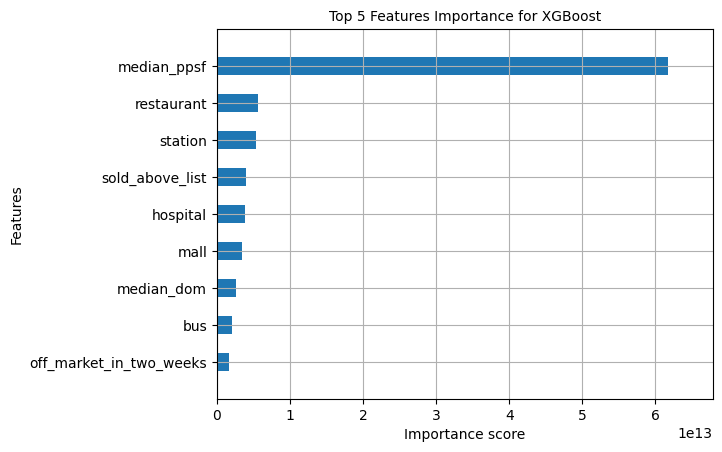

In [44]:
from xgboost import plot_importance, plot_tree

plot_importance(
    xgb,
    importance_type="gain",
    max_num_features=len(X_train.columns),
    height=0.5,
    show_values=False
)
plt.title("Top 5 Features Importance for XGBoost", fontsize=10)
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_eval)
metric_evaluation(y_pred_rf, y_eval)

The baseline model metrics are: 
ROOT_MEAN_SQUARED_ERROR:  167,245.08
MEAN_ABSOLUTE_ERROR:  93,437.76
COEFFICIENT_OF_DETERMINATION: 69.30%
